# Assignment 2: Linear Models and Validation Metrics
Due Date: October 10, 2023
<br>
<br>
Name: Christian Valdez

## Part 1: Classification (14.5 marks total)

### Step 0: Import Libraries

In [118]:
# common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# dataset
import yellowbrick
from yellowbrick.datasets import load_spam, load_concrete

# sklearn
from sklearn.model_selection import train_test_split

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

In [119]:
# import spam dataset from yellowbrick library
X, y = yellowbrick.datasets.loaders.load_spam(
    data_home=None, return_dataset=False)

In [120]:
# print size of X
rows, cols = X.shape
data_size = X.size
print(f"There are {rows} samples and {cols} features.\nThe size of the feature matrix is {data_size}.")

There are 4600 samples and 57 features.
The size of the feature matrix is 262200.


In [121]:
# print size of y
rows, = y.shape
print(f"The feature matrix comes with the corresponding {rows} labels.\n0 indicating a not spam email (ham) and 1 for a spam email.")

The feature matrix comes with the corresponding 4600 labels.
0 indicating a not spam email (ham) and 1 for a spam email.


In [122]:
# feature data type of X
print("Data type for features: ", )
for feature, dtype in X.dtypes.items():
    print(f"{feature}: {dtype}")

Data type for features: 
word_freq_make: float64
word_freq_address: float64
word_freq_all: float64
word_freq_3d: float64
word_freq_our: float64
word_freq_over: float64
word_freq_remove: float64
word_freq_internet: float64
word_freq_order: float64
word_freq_mail: float64
word_freq_receive: float64
word_freq_will: float64
word_freq_people: float64
word_freq_report: float64
word_freq_addresses: float64
word_freq_free: float64
word_freq_business: float64
word_freq_email: float64
word_freq_you: float64
word_freq_credit: float64
word_freq_your: float64
word_freq_font: float64
word_freq_000: float64
word_freq_money: float64
word_freq_hp: float64
word_freq_hpl: float64
word_freq_george: float64
word_freq_650: float64
word_freq_lab: float64
word_freq_labs: float64
word_freq_telnet: float64
word_freq_857: float64
word_freq_data: float64
word_freq_415: float64
word_freq_85: float64
word_freq_technology: float64
word_freq_1999: float64
word_freq_parts: float64
word_freq_pm: float64
word_freq_direc

In [123]:
# feature data type of y
print("Data type for labels: ", y.dtypes)

Data type for labels:  int64


### Step 2: Data Processing (1.5 marks)

In [124]:
# check for missing values
missing_values_X = X.isnull().sum().sum()
missing_values_y = y.isnull().sum()

if missing_values_X != 0:
    X.fillna(0, inplace=True)
    print(f"Filled missing values in X. Total filled: {missing_values_X}")
else:
    print("There are no missing values in X.")

if missing_values_y != 0:
    y.fillna(0, inplace=True)
    print(f"Filled missing values in y. Total filled: {missing_values_y}")
else:
    print("There are no missing values in y.")

There are no missing values in X.
There are no missing values in y.


In [125]:
# split data with test size 5% of the data
X_train, X_small, y_train, y_small = train_test_split(
    X, y, test_size=0.05, random_state=0)

print(f"Training set size: {len(X_small)}")
print(f"Test set size: {len(y_small)}")

Training set size: 230
Test set size: 230


### Step 3: Implement Machine Learning Model

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`.
3. Implement the machine learning model with three different datasets: 
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`

### Step 4: Validate Model

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [126]:
# import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# get the first two columns
x_first_two_columns = X.iloc[:, :2]
x_first_two_columns.head()

# results dataframe
results = {
    "Data Size": [],
    "Training Accuracy": [],
    "Validation Accuracy": []
}

# datasets
X_datasets = [X, x_first_two_columns, X_small]
X_labels = [y, y, y_small]
X_dataset_names = ["Full Dataset", "First Two Columns", "5% of the dataset"]

for dataset_num in range(3):
    row, col = X_datasets[dataset_num].shape

    print(f"Training with {X_dataset_names[dataset_num]}")
    x1, x2, y1, y2 = train_test_split(X_datasets[dataset_num], X_labels[dataset_num], test_size=0.2, random_state=0)

    # instantiate the model
    model = LogisticRegression(max_iter=2000)

    # train the dataset
    model.fit(x1, y1)

    # training accuracy
    training_score = model.score(x1, y1)

    # validation accuracy
    validation_score = model.score(x2, y2)

    # appends to results table
    results["Data Size"].append(row*col)
    results["Training Accuracy"].append(training_score)
    results["Validation Accuracy"].append(validation_score)

results_df = pd.DataFrame(results)
results_df.index = X_dataset_names

Training with Full Dataset
Training with First Two Columns
Training with 5% of the dataset


In [127]:
results_df

,Data Size,Training Accuracy,Validation Accuracy
Full Dataset,262200,0.927989,0.936957
First Two Columns,9200,0.614946,0.593478
5% of the dataset,13110,0.956522,0.804348


### Questions (4 marks)
1. How do the training and validation accuracy change depending on the amount of data used? Explain with values.

With the full dataset, the training and validation accuracies are quite similar, registering at **0.928** and **0.937** respectively. Interestingly, the training accuracy is slightly lower, possibly suggesting that the training data might be more intricate than the validation set. 

Using only 5% of the data, there's a noticeable divergence between the training and validation accuracies — **0.957** versus **0.804**. This disparity suggests potential overfitting.

Reducing the features yields diminished accuracies for both training and validation, recorded at **0.615** and **0.593**, respectively.

2. In this case, what do a false positive and a false negative represent? Which one is worse?

A false positive indicates that the model erroneously labeled an email as spam when it wasn't. Conversely, a false negative means the model missed identifying a genuine spam email. The latter, false negatives, are more detrimental since overlooking spam emails can introduce security risks. While mislabeling a genuine email as spam isn't ideal, it's less concerning than the alternative.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. I utilized ChatGPT for code review and addressing my queries, and also referred to Python documentation sites like Pandas and scikit-learn.

- [ChatGPT](https://chat.openai.com/share/06987052-fc84-4545-8c0b-ef26077cca12)
- [Pandas](https://pandas.pydata.org/docs/index.html)
- [scikit learn](https://scikit-learn.org/stable/index.html)

2. I completed the steps in order.

3. My initial prompt to ChatGPT was: "Act as a machine learning engineer. You will guide me through my assignment, helping me with code, reviews, and brainstorming. I'll use Python for scripting. Respond with 'yes' if you understand." Subsequent prompts sought code reviews, clarifications, and answer verifications. For reviews, I often pasted my enhanced code.

4. Some instructions were ambiguous. I sought clarification from Dr. Dawson or the TAs when needed. I also decluttered the notebook for better organization, finding its initial state a tad restrictive.

## Part 2: Regression (10.5 marks total)

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

In [128]:
# import concrete dataset
X, y = yellowbrick.datasets.loaders.load_concrete(
    data_home=None, return_dataset=False)

In [129]:
# print size X
rows, cols = X.shape
data_size = X.size
print(
    f"There are {rows} samples and {cols} features.\nThe size of the feature matrix is {data_size}.")


There are 1030 samples and 8 features.
The size of the feature matrix is 8240.


In [130]:
# print size of y
rows, = y.shape
print(
    f"The feature matrix comes with the corresponding {rows} labels.\nThis is the comprehensive strength of the concrete mixtures")

The feature matrix comes with the corresponding 1030 labels.
This is the comprehensive strength of the concrete mixtures


In [131]:
# feature data type of X
print("Data type for features: ", )
for feature, dtype in X.dtypes.items():
    print(f"{feature}: {dtype}")

Data type for features: 
cement: float64
slag: float64
ash: float64
water: float64
splast: float64
coarse: float64
fine: float64
age: int64


In [132]:
# feature data type of y
print("Data type for labels: ", y.dtypes)

Data type for labels:  float64


### Step 2: Data Processing (0.5 marks)

In [133]:
# check for missing values
missing_values_X = X.isnull().sum().sum()
missing_values_y = y.isnull().sum()

if missing_values_X != 0:
    X.fillna(0, inplace=True)
    print(f"Filled missing values in X. Total filled: {missing_values_X}")
else:
    print("There are no missing values in X.")

if missing_values_y != 0:
    y.fillna(0, inplace=True)
    print(f"Filled missing values in y. Total filled: {missing_values_y}")
else:
    print("There are no missing values in y.")


There are no missing values in X.
There are no missing values in y.


### Step 3: Implement Machine Learning Model (1 mark)

In [134]:
#import models and accuracy scores
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [135]:
# split data train = 80%, test = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [136]:
# initialize model
linear_model = LinearRegression()

# train model
linear_model.fit(X_train, y_train)

LinearRegression()

### Step 4: Validate Model (1 mark)

Calculate the training and validation accuracy using mean squared error and R2 score.

In [137]:
# make predictions
linear_prediction_train = linear_model.predict(X_train)
linear_prediction_test = linear_model.predict(X_test)

# evaluate the model
mse_train = mean_squared_error(y_train, linear_prediction_train)
mse_test = mean_squared_error(y_test, linear_prediction_test)

# Compute and print the R^2 score
r2_train = r2_score(y_train, linear_prediction_train)
r2_test = r2_score(y_test, linear_prediction_test)

### Step 5: Visualize Results (1 mark)

In [138]:
results_lr = {
    "Training Accuracy": [mse_train, r2_train],
    "Validation Accuracy": [mse_test, r2_test]
}
results_lr = pd.DataFrame(results_lr)
results_lr.index = ["MSE", "R2 Score"]

In [139]:
results_lr

,Training Accuracy,Validation Accuracy
MSE,110.345501,95.635335
R2 Score,0.609071,0.636898


### Questions (2 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?

The linear model yielded decent results: a training MSE of **110.25** and a validation MSE of **95.64**. Ideally, both MSE values would be lower, with the training MSE less than the validation MSE. The R2 scores were **0.609** for training and **0.637** for validation. An R2 score closer to **1** would be optimal.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. I utilized ChatGPT for code review and addressing my queries, and also referred to Python documentation sites like Pandas and scikit-learn.

- [ChatGPT](https://chat.openai.com/share/f74a1c4b-c68a-472d-ba01-b76b610219c7)
- [Pandas](https://pandas.pydata.org/docs/index.html)
- [scikit learn](https://scikit-learn.org/stable/index.html)

2. I completed the steps in order.

3. My initial prompt to ChatGPT was: "Act as a machine learning engineer. You will guide me through my assignment, helping me with code, reviews, and brainstorming. I'll use Python for scripting. Respond with 'yes' if you understand." Subsequent prompts sought code reviews, clarifications, and answer verifications. For reviews, I often pasted my enhanced code.

4. I was unfamiliar with the significance of MSE and R2 score, so I researched their meanings online and cross-referenced with ChatGPT.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


A clear trend emerged: more training samples and features typically improve model performance. This was evident with the spam dataset, where logistic regression achieved a training accuracy of **0.928** and a validation accuracy of **0.937**. Conversely, reducing samples and features degrades performance.

For the concrete dataset, the linear regression model yielded decent results, with an R2 score between **60-64%**. Ideally, this should approach 1. Alternative models, like the **Decision Tree**, might offer enhanced accuracy.

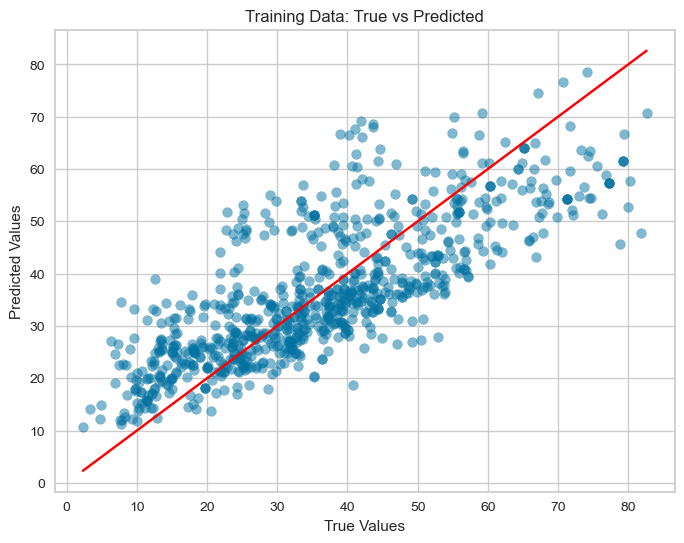

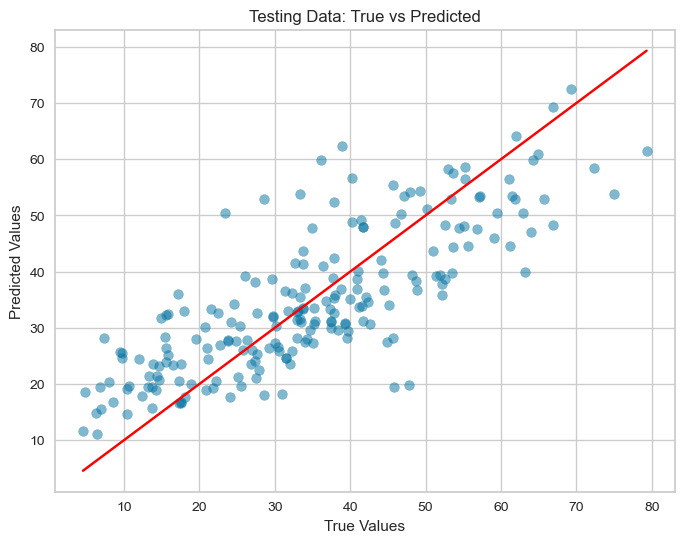

In [140]:
def plot_true_vs_predicted(true_values, predicted_values, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.plot([min(true_values), max(true_values)], [
             min(true_values), max(true_values)], color='red')  # Diagonal line
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()


# For Training Data
plot_true_vs_predicted(y_train, linear_prediction_train, "Training Data: True vs Predicted")

# For Testing Data
plot_true_vs_predicted(y_test, linear_prediction_test, "Testing Data: True vs Predicted")


## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


I wasn't a fan of merely computing accuracy scores and displaying them as text; visual representations would have been more insightful. Some instructions, such as the recommended training size, were ambiguous, and there were typos in part 2 of the assignment.

## Part 5: Bonus Question (4 marks)

Repeat Part 2 with Ridge and Lasso regression to see if you can improve the accuracy results. Which method and what value of alpha gave you the best R^2 score? Is this score "good enough"? Explain why or why not.

**Remember**: Only test values of alpha from 0.001 to 100 along the logorithmic scale.

Using ridge regression with an alpha of 0.001 yielded the best results: a training MSE of **110.346** and a validation MSE of **95.635**. The R2 score ranged from **60-64%**, closely mirroring the linear regression model's performance. Thus, either model offers comparable outcomes.

In [141]:
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha_value in alpha_values:
    # Initialize and train a Ridge regression model
    ridge_model = Ridge(alpha=alpha_value)  # You can tune the alpha parameter
    ridge_model.fit(X_train, y_train)

    # make predictions
    ridge_prediction_train = ridge_model.predict(X_train)
    ridge_prediction_test = ridge_model.predict(X_test)

    # evaluate the model
    mse_train = mean_squared_error(y_train, ridge_prediction_train)
    mse_test = mean_squared_error(y_test, ridge_prediction_test)

    # Compute and print the R^2 score
    r2_train = r2_score(y_train, ridge_prediction_train)
    r2_test = r2_score(y_test, ridge_prediction_test)

    print(f"Alpha: {alpha_value} | Train MSE: {mse_train}, Test MSE: {mse_test}, Train R^2: {r2_train}, Test R^2: {r2_test}")


Alpha: 0.001 | Train MSE: 110.34550122934111, Test MSE: 95.63533472335102, Train R^2: 0.6090710418548884, Test R^2: 0.6368981107342884
Alpha: 0.01 | Train MSE: 110.34550122934206, Test MSE: 95.63533379137245, Train R^2: 0.6090710418548849, Test R^2: 0.6368981142727628
Alpha: 0.1 | Train MSE: 110.34550122943895, Test MSE: 95.63532447176289, Train R^2: 0.6090710418545418, Test R^2: 0.6368981496568376
Alpha: 1 | Train MSE: 110.34550123912643, Test MSE: 95.6352312932172, Train R^2: 0.6090710418202212, Test R^2: 0.6368985034309533
Alpha: 10 | Train MSE: 110.34550220603575, Test MSE: 95.63430125996432, Train R^2: 0.6090710383946818, Test R^2: 0.6369020345194594
Alpha: 100 | Train MSE: 110.34559708714235, Test MSE: 95.62517337012183, Train R^2: 0.6090707022525488, Test R^2: 0.6369366906855762


In [142]:
results_ridge = {
    "Training Accuracy": [mse_train, r2_train],
    "Validation Accuracy": [mse_test, r2_test]
}
results_ridge = pd.DataFrame(results_ridge)
results_ridge.index = ["MSE", "R2 Score"]

In [143]:
results_ridge

,Training Accuracy,Validation Accuracy
MSE,110.345597,95.625173
R2 Score,0.609071,0.636937


In [144]:
for alpha_value in alpha_values:
    # Initialize and train a Lasso regression model
    lasso_model = Lasso(alpha=alpha_value, max_iter=1000)
    lasso_model.fit(X_train, y_train)

    # make predictions
    lasso_prediction_train = lasso_model.predict(X_train)
    lasso_prediction_test = lasso_model.predict(X_test)

    # evaluate the model
    mse_train = mean_squared_error(y_train, lasso_prediction_train)
    mse_test = mean_squared_error(y_test, lasso_prediction_test)

    # Compute and print the R^2 score
    r2_train = r2_score(y_train, lasso_prediction_train)
    r2_test = r2_score(y_test, lasso_prediction_test)

    print(f"Alpha: {alpha_value} | Train MSE: {mse_train}, Test MSE: {mse_test}, Train R^2: {r2_train}, Test R^2: {r2_test}")

Alpha: 0.001 | Train MSE: 110.3455012912368, Test MSE: 95.63497051708751, Train R^2: 0.609071041635606, Test R^2: 0.6368994935284487
Alpha: 0.01 | Train MSE: 110.34550741901397, Test MSE: 95.6316975194154, Train R^2: 0.6090710199262883, Test R^2: 0.6369119202287027
Alpha: 0.1 | Train MSE: 110.34612017864993, Test MSE: 95.59954510433754, Train R^2: 0.6090688490585736, Test R^2: 0.637033994383543
Alpha: 1 | Train MSE: 110.40734037862987, Test MSE: 95.33585014584196, Train R^2: 0.608851959844886, Test R^2: 0.6380351738941974
Alpha: 10 | Train MSE: 112.09305471669039, Test MSE: 95.11479050693202, Train R^2: 0.6028798581953714, Test R^2: 0.6388744784541781
Alpha: 100 | Train MSE: 151.36849205390956, Test MSE: 126.14256844074959, Train R^2: 0.4637359363510064, Test R^2: 0.5210702712531836


In [145]:
results_lasso = {
    "Training Accuracy": [mse_train, r2_train],
    "Validation Accuracy": [mse_test, r2_test]
}
results_lasso = pd.DataFrame(results_lasso)
results_lasso.index = ["MSE", "R2 Score"]

In [146]:
results_lasso

,Training Accuracy,Validation Accuracy
MSE,151.368492,126.142568
R2 Score,0.463736,0.521070


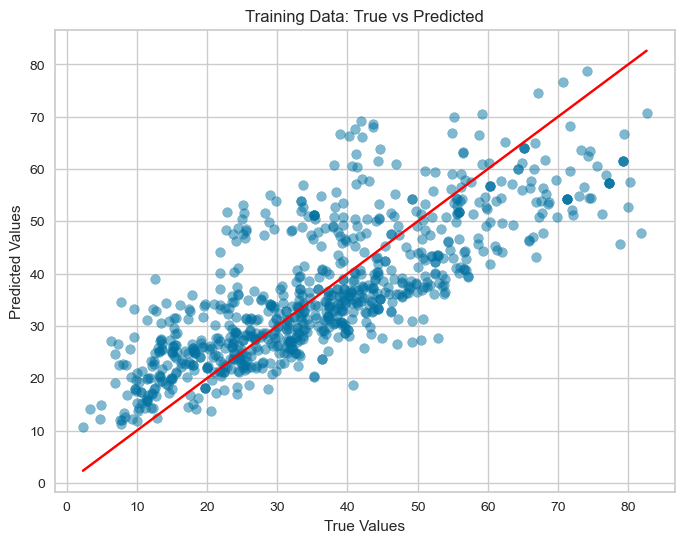

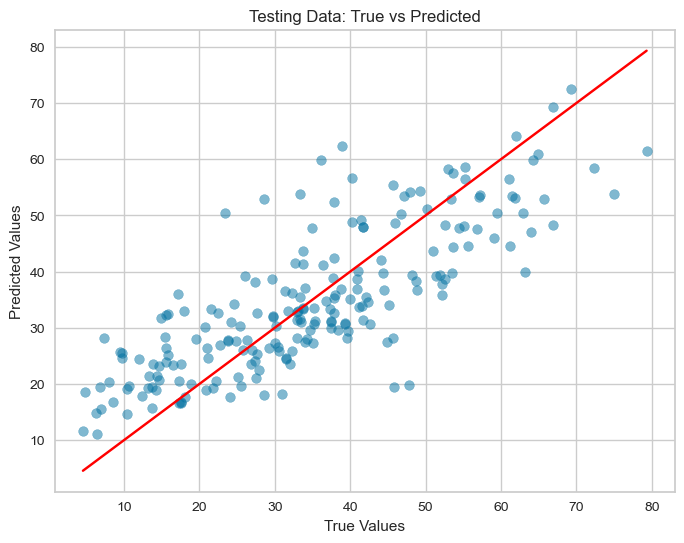

In [147]:
# For Training Data
plot_true_vs_predicted(y_train, ridge_prediction_train, "Training Data: True vs Predicted")

# For Testing Data
plot_true_vs_predicted(y_test, ridge_prediction_test, "Testing Data: True vs Predicted")


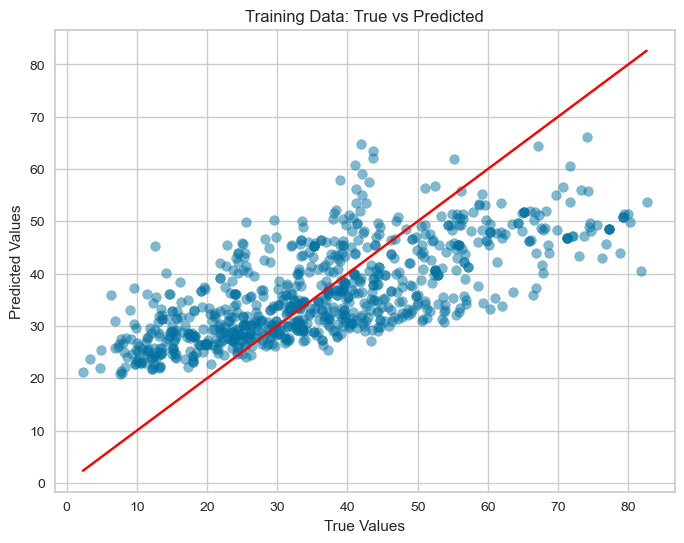

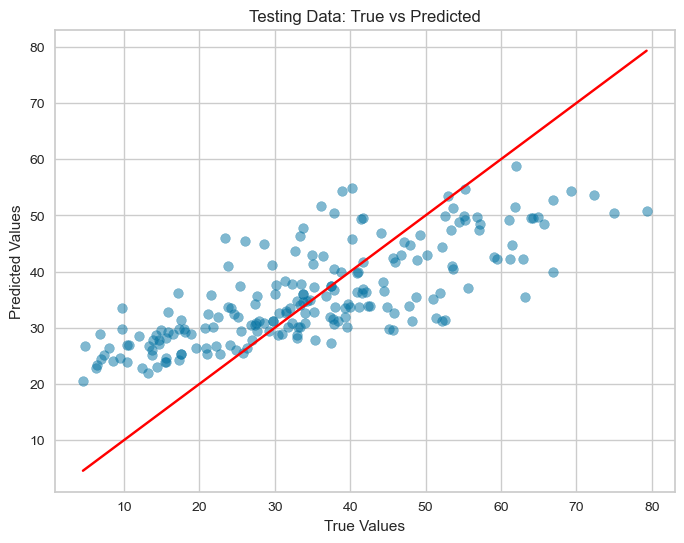

In [148]:
# For Training Data
plot_true_vs_predicted(y_train, lasso_prediction_train, "Training Data: True vs Predicted")

# For Testing Data
plot_true_vs_predicted(y_test, lasso_prediction_test, "Testing Data: True vs Predicted")
